# **TITLE**

Hello reader, my name is Ben and this is a tutorial on the basics of data science. In this tutorial, we will be...

## Data Curation and Wrangling

In [875]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, glob
pd.options.mode.chained_assignment = None

https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/#:~:text=2.,and%20merge%20them%20into%20DataFrame.

In [876]:
path = './raw-data/'
AMT_TOURNAMENTS = 12
data = pd.concat(map(pd.read_csv, glob.glob(path + '*.csv')))

data.reset_index(drop=True, inplace=True)
data.columns = ['tour', 'year', 'season', 'event_name', 'event_id', 'player_name', 'player_id', 'finish', 'round', 'course_name', 'course_num', 'course_par', 'start_hole', 'teetime',
                'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']

data.head()


,tour,year,season,event_name,event_id,player_name,player_id,finish,round,course_name,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,1,Augusta National Golf Club,...,3.207,5.523,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0
1,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,2,Augusta National Golf Club,...,3.062,1.330,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0
2,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,3,Augusta National Golf Club,...,5.630,7.426,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0
3,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,4,Augusta National Golf Club,...,1.103,-0.370,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0
4,pga,2021,2021,The Masters #2,536,"Zalatoris, Will",19428,2,1,Augusta National Golf Club,...,2.985,4.523,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0


In [884]:
players = data[['player_name', 'player_id']].drop_duplicates()
players.reset_index(drop=True, inplace=True)
players.head()

,player_name,player_id
0,"Matsuyama, Hideki",13562
1,"Zalatoris, Will",19428
2,"Spieth, Jordan",14636
3,"Schauffele, Xander",19895
4,"Leishman, Marc",7649


https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [878]:
# Create a new table with information about each of the events in the dataset
events = data[['event_id', 'event_name', 'course_num', 'course_name', 'course_par', 'year']].drop_duplicates()
events.columns = ['id', 'event_name', 'course_num', 'course_name', 'course_par', 'year']

# Synchronize event names
events['event_name'] = events['event_name'].apply(lambda x: "The Masters" if "Masters" in x else x)
events['event_name'] = events['event_name'].apply(lambda x: "U.S. Open" if "U.S." in x else x)

# Sort dataset so that events are grouped and in chronological order
# Reset index so that it is a unique identifier for each event
events.sort_values(by=['event_name', 'year'], inplace=True)
events = events.reset_index(drop=True)

for event in data['event_id'].unique():
    for year in data['year'].unique():
        if not events.loc[(events['id'] == event) & (events['year'] == year)].empty:
            data.loc[(data['event_id'] == event) & (data['year'] == year), 'event_id'] = events.loc[(events['id'] == event) & (events['year'] == year)].index[0]

# Make the index the event id for each event
events['id'] = events.index
events = events.set_index('id')

events['tournament_id'] = events['event_name'].apply(lambda x: 'P' if 'PGA' in str(x) else 'M' if 'Masters' in str(x) else 'U' if 'U.S.' in str(x) else 'O')

events

,event_name,course_num,course_name,course_par,year,tournament_id
id,,,,,,
0,PGA Championship,697,Ocean Course at Kiawah Island,72,2021,P
1,PGA Championship,611,Southern Hills Country Club,70,2022,P
2,PGA Championship,514,Oak Hill Country Club,70,2023,P
3,The Masters,14,Augusta National Golf Club,72,2021,M
4,The Masters,14,Augusta National Golf Club,72,2022,M
5,The Masters,14,Augusta National Golf Club,72,2023,M
6,The Open Championship,778,Royal St. George's GC,70,2021,O
7,The Open Championship,668,St. Andrews Links (Old Course),72,2022,O
8,The Open Championship,724,Royal Liverpool,71,2023,O


Discuss null values

https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/

In [879]:
data['net_round_score'] = data['round_score'] - data['course_par']
data['finish'] = data['finish'].apply(lambda x: str(x).replace('T', ''))
data['finish'] = data['finish'].apply(lambda x: np.nan if not x.isdigit() else int(x))


finishes = data[['event_id', 'year', 'player_name', 'player_id', 'finish', 'net_round_score', 'great_shots', 'poor_shots']]

averages = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']
sums = ['great_shots', 'poor_shots', 'net_round_score']

for feature in averages:
    avg = data.groupby(['event_id', 'player_id'])[feature].mean()
    finishes[feature] = finishes.apply(lambda x: avg.loc[x['event_id'], x['player_id']], axis=1)

for feature in sums:
    sum = finishes.groupby(['player_id', 'event_id'])[feature].sum()
    finishes[feature] = finishes.apply(lambda x: sum.loc[x['player_id'], x['event_id']], axis=1)

finishes['tournament_id'] = finishes['event_id'].apply(lambda x: events.loc[x, 'tournament_id'])

finishes = finishes.rename(columns={'net_round_score': 'net_score'})
finishes.drop_duplicates(inplace=True)
finishes.reset_index(drop=True, inplace=True)

finishes.head()

,event_id,year,player_name,player_id,finish,net_score,great_shots,poor_shots,sg_putt,sg_arg,...,sg_ott,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,tournament_id
0,3,2021,"Matsuyama, Hideki",13562,1.0,-10,21.0,14.0,0.22650,1.40100,...,0.35000,3.25050,3.47725,297.125,0.64275,0.69450,0.69475,75.147250,30.83200,M
1,3,2021,"Zalatoris, Will",19428,2.0,-9,19.0,13.0,1.21600,0.06750,...,0.97575,2.01075,3.22725,305.125,0.69625,0.73625,0.54900,71.776500,37.97325,M
2,3,2021,"Spieth, Jordan",14636,3.0,-7,15.0,13.0,-0.87575,1.69925,...,0.78425,3.60300,2.72725,303.250,0.75025,0.77800,0.52500,63.049250,31.62350,M
3,3,2021,"Schauffele, Xander",19895,3.0,-7,21.0,21.0,-0.26725,1.51200,...,0.83150,2.99400,2.72725,312.925,0.73200,0.70825,0.63525,59.196333,30.98175,M
4,3,2021,"Leishman, Marc",7649,5.0,-6,9.0,8.0,0.43525,1.02850,...,-0.45325,2.04175,2.47725,295.550,0.51800,0.63875,0.64275,48.157750,31.43550,M


## Exploratory Analysis and Data Visualization

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/#

Text(0.5, 1.0, 'Average Amount of Great Shots and Poor Shots Per Major by Finish')

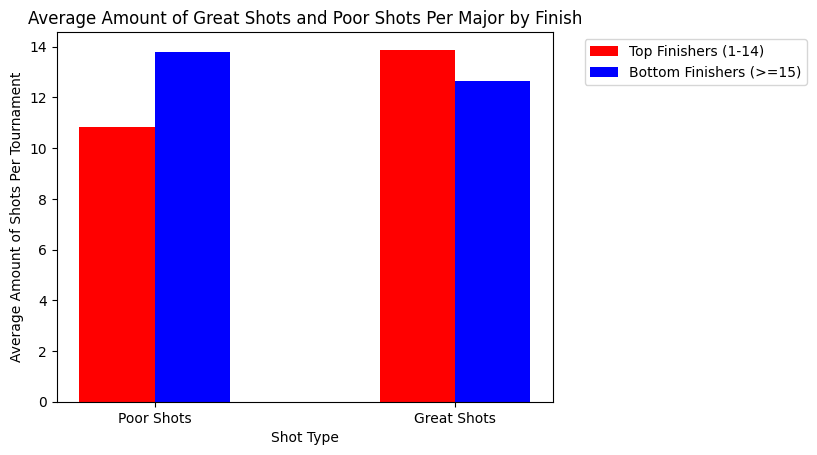

In [880]:
top_finishers = finishes[finishes['finish'] < 15]
bottom_finishers = finishes[finishes['finish'] >= 15]

barWidth = 0.25

br1 = [0, 1]
br2 = [x + barWidth for x in br1]

plt.bar(br1, [top_finishers['poor_shots'].mean(), top_finishers['great_shots'].mean()], color='r', width=barWidth, label='Top Finishers (1-14)')
plt.bar(br2, [bottom_finishers['poor_shots'].mean(), bottom_finishers['great_shots'].mean()], color='b', width=barWidth, label='Bottom Finishers (>=15)')

plt.xticks([r + barWidth / 2 for r in range(len(br1))], ['Poor Shots', 'Great Shots'])
plt.ylabel('Average Amount of Shots Per Tournament')
plt.xlabel('Shot Type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Average Amount of Great Shots and Poor Shots Per Major by Finish')

Text(0.5, 1.0, 'Net Score of Winner by Major Tournament for Multiple Years')

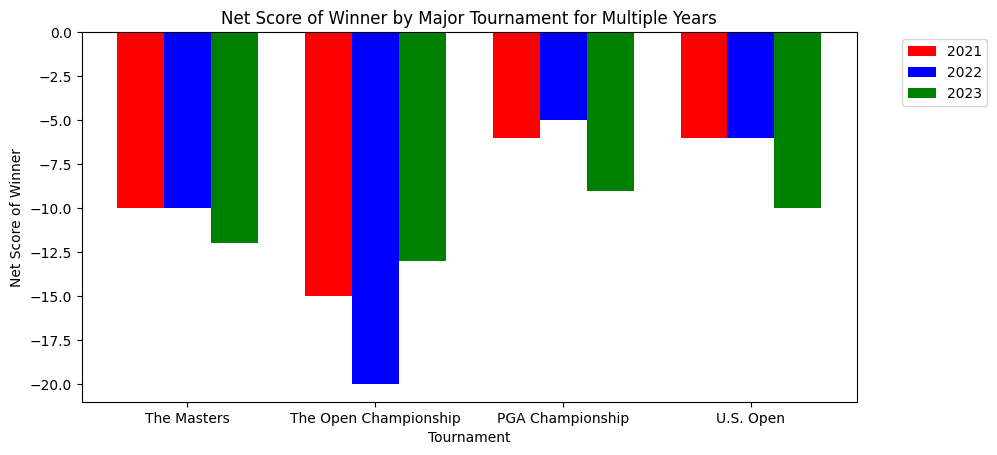

In [881]:
winners = finishes[finishes['finish'] == 1]

plt.figure().set_figwidth(10)
br1 = [0, 1, 2, 3]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, [*winners[winners['year'] == 2021].sort_values(by='tournament_id')['net_score'].values], color='r', width=barWidth, label='2021')
plt.bar(br2, [*winners[winners['year'] == 2022].sort_values(by='tournament_id')['net_score'].values], color='b', width=barWidth, label='2022')
plt.bar(br3, [*winners[winners['year'] == 2023].sort_values(by='tournament_id')['net_score'].values], color='g', width=barWidth, label='2023')

plt.xticks([r + barWidth for r in range(len(br1))], [*events.sort_values(by='tournament_id')['event_name'].unique()])
plt.ylabel('Net Score of Winner')
plt.xlabel('Tournament')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Net Score of Winner by Major Tournament for Multiple Years')

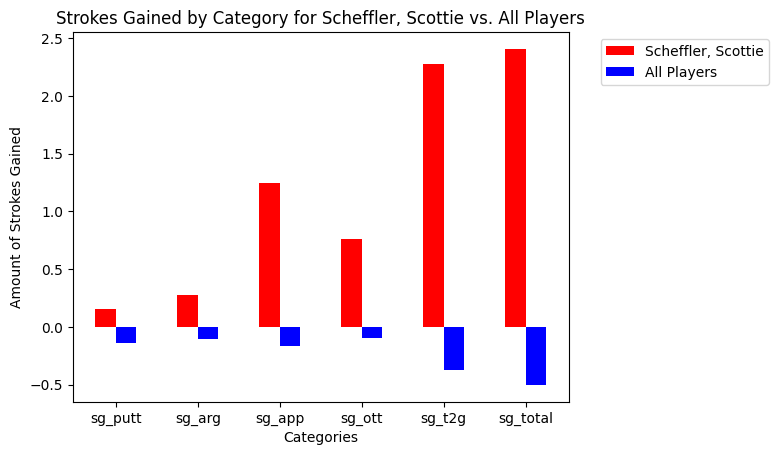

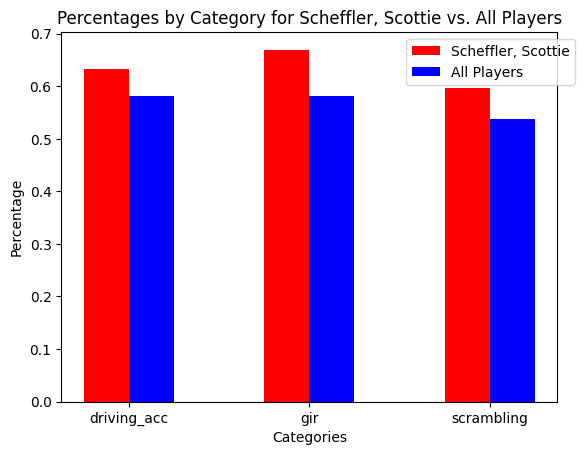

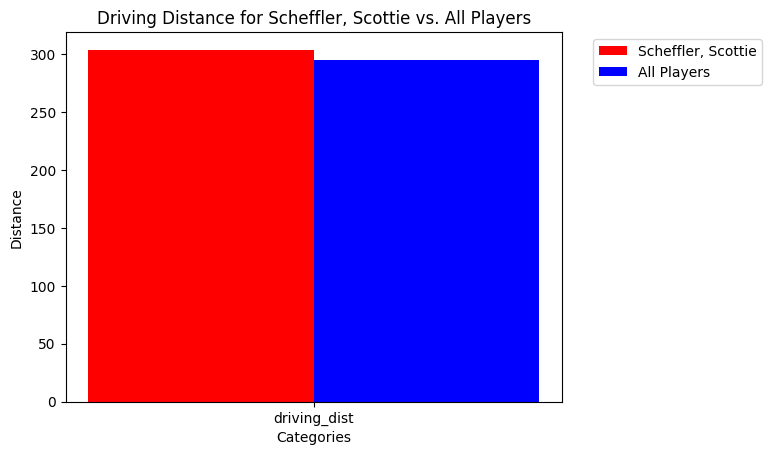

In [907]:
lowest_finishes = 1000
lowest_finishes_player = None

for player in finishes['player_id'].unique():
    player_finishes = finishes[finishes['player_id'] == player]
    if player_finishes.__len__() >= 10 and np.nan not in player_finishes['finish'].unique() and player_finishes['finish'].sum() < lowest_finishes:
        lowest_finishes = player_finishes['finish'].sum()
        lowest_finishes_player = player

categories = [['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'], ['driving_acc', 'gir', 'scrambling'], ['driving_dist']]
iters = 0
lowest_player_avgs = []
all_player_avgs = []

for list in categories:
    for category in list:
        lowest_player_avgs.append(finishes[finishes['player_id'] == lowest_finishes_player][category].mean())
        all_player_avgs.append(finishes[category].mean())


    br1 = np.arange(len(list))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, lowest_player_avgs, color='r', width=barWidth, label=players[players['player_id'] == lowest_finishes_player]['player_name'].values[0])
    plt.bar(br2, all_player_avgs, color='b', width=barWidth, label='All Players')

    plt.xticks([r + barWidth - barWidth / 2 for r in range(len(list))], list)
    plt.xlabel('Categories')
    if iters == 0:
        plt.ylabel('Amount of Strokes Gained')
        plt.title('Strokes Gained by Category for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    elif iters == 1:
        plt.ylabel('Percentage')
        plt.title('Percentages by Category for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    else:
        plt.ylabel('Distance')
        plt.title('Driving Distance for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

    lowest_player_avgs = []
    all_player_avgs = []
    iters += 1

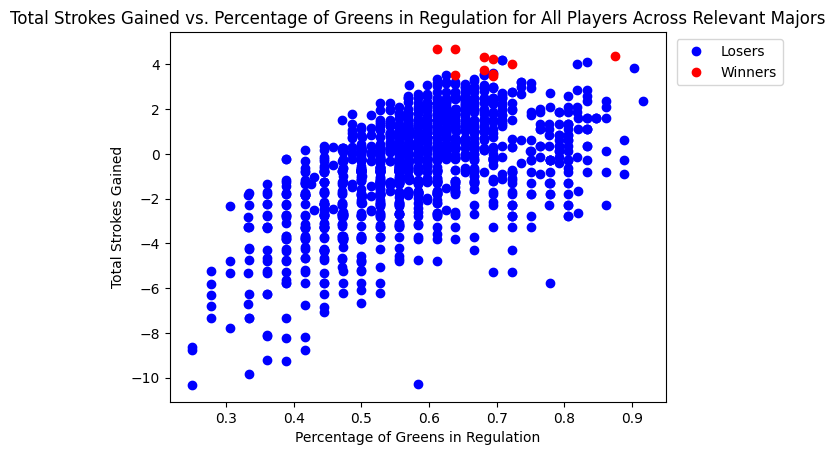

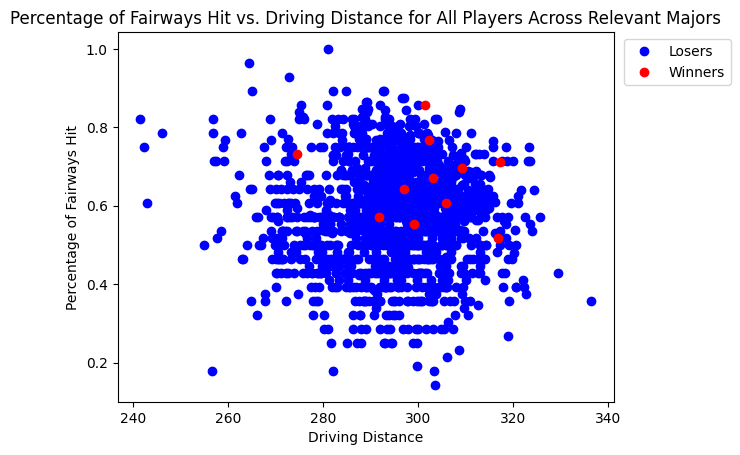

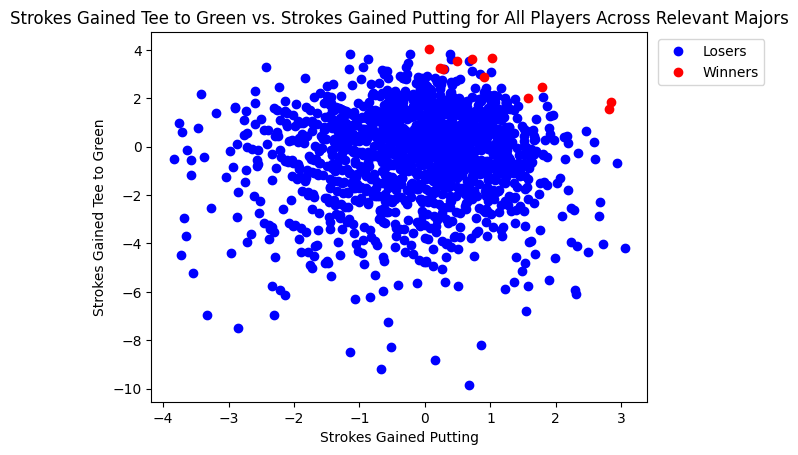

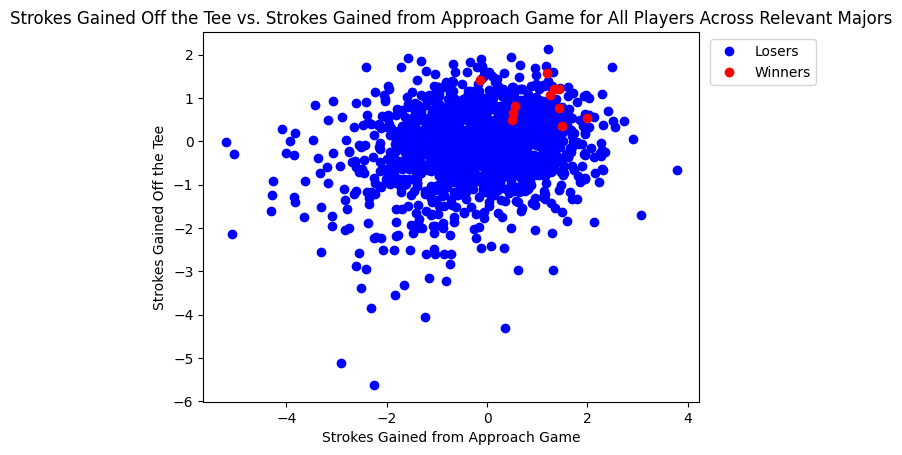

In [918]:
winners = finishes[finishes['finish'] == 1]
losers = finishes[finishes['finish'] != 1]

categories = [['gir', 'sg_total', 'Percentage of Greens in Regulation', 'Total Strokes Gained'], ['driving_dist', 'driving_acc', 'Driving Distance', 'Percentage of Fairways Hit'],
              ['sg_putt', 'sg_t2g', 'Strokes Gained Putting', 'Strokes Gained Tee to Green'], ['sg_app', 'sg_ott', 'Strokes Gained from Approach Game', 'Strokes Gained Off the Tee']]

for category in categories:
    plt.plot(losers[category[0]], losers[category[1]], 'o', label='Losers', color='blue')
    plt.plot(winners[category[0]], winners[category[1]], 'o', label='Winners', color='red')
    plt.xlabel(category[2])
    plt.ylabel(category[3])
    plt.legend(bbox_to_anchor=(1.25, 1))
    plt.title(category[3] + ' vs. ' + category[2] + ' for All Players Across Relevant Majors')
    plt.show()